In [ ]:
# feature 의 차수를 높이면 예측 정확도가 올라가는 경향이 있다.

In [1]:
# from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항 feature를 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

선형회귀

In [3]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [5]:
df.describe()

,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [7]:
perch_full
# column의 개수가 벌싸 3개라서, reshape(-1,1)과정이 필요하지 않다

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [8]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [11]:
train_input,test_input,train_target,test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

len(train_input)

42

In [13]:
# 데이터 훈련
# feature(특성)**2
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [17]:
# train 예측 정확도
lr.score(train_input, train_target)

0.9559326821885706

In [18]:
# test 예측 정확도
lr.score(test_input,test_target)

0.8796419177546367

In [31]:
# 특성을 추가해서 모델적용 - Feature는 컬럼이라고 생각하기( 테스트용 )
from sklearn.preprocessing import PolynomialFeatures 

# degree = 2 -> 차수 늘리기 x^2
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])


array([[  2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.,  16.,  24.,
         36.,  54.,  81.,  32.,  48.,  72., 108., 162., 243.]])

In [32]:
# 특성을 추가해서 모델적용 - Feature는 컬럼이라고 생각하기
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [29]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [24]:
train_poly.shape
# 맨 앞 1이란 값은 아무 의미가 없는 값이라 제외해도 됨
# PolynomialFeatures(include_bias=False)

(42, 9)

In [25]:
# 데이터 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [28]:
# 정확도
lr.score(test_poly,test_target)
# 0.8796419177546367 -> 0.9714559911594125 으로 예측 정확도가 올라감

0.9714559911594125

[ 컬럼의 차수 높이기 ]
degree = 3

In [33]:
# 특성을 추가해서 모델적용 - Feature는 컬럼이라고 생각하기
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree=3,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [35]:
train_poly.shape  # 컬럼이 19개로 늘어남

(42, 19)

In [37]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [39]:
lr.score(train_poly,train_target)

0.9963872340980141

In [38]:
lr.score(test_poly,test_target)

0.9410534492198891

[ 컬럼의 차수 높이기 ]
degree = 5

In [40]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [41]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [42]:
lr.score(train_poly,train_target)

0.9999999999997232

In [45]:
lr.score(test_poly,test_target)
# 특성 값이 많이 늘어남에 따른 예측값 오류

-144.40564483377855

규제 - 릿지규제(회귀), 라쏘규제(회귀)

선형회귀에서 특성의 값이 많이 늘어났능 때, 특성의 값을 규제, test set에서도 제대로 예측할 수 있도록 함

In [46]:
# 릿지회귀, 라쏘회귀 적용을 시키려면
# 꼭!! 표준화 작업을 해줘야 함
# (데이터-평균) / 표준편차

In [52]:
from sklearn.preprocessing import StandardScaler  # 표준화 작업

# 표준화 작업 ( degree = 5, 차수가 늘어남에 따른 test 예측 정확도 오류를 바로잡고자 함)
ss = StandardScaler()
ss.fit(train_poly)  # 표준화 적용

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [53]:
# 릿지규제(회귀)
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)

Ridge()

In [54]:
ridge.score(train_scaled,train_target)

0.9896101671037343

In [55]:
ridge.score(test_scaled, test_target)
# test에서도 아주 좋은 예측 정확도 값이 나왔음!! 굳굳

0.9790693977615387

* 선형회귀
- 특성값 추가
- 규제
- 과대 적합을 해소

In [57]:
# 릿지회귀에서도 강도를 어느정도로 할 지에 따라, 예측률이 높아지는 형태가 나옴
# Ridge(alpha=1) -> 늘려보면서 조정
# for 문을 사용해서 alpha값 조정할 수 있음

# 그래프 적용을 위한 배열
train_score= []
test_score = []

alpha_list =[0.001,0.01,0.1,1,10,100]  # 0.001 ~ 100 예측률

for alpha in alpha_list:
    # 규제를 적용한 훈련
    ridge = Ridge(alpha=alpha) # 0.001,0.01,0.1,1,10,100
    ridge.fit(train_scaled, train_target)
    train1 = ridge.score(train_scaled, train_target)
    test1 = ridge.score(test_scaled, test_target)
    train_score.append(train1)  # 리스트에 추가
    test_score.append(test1)    # 리스트에 추가

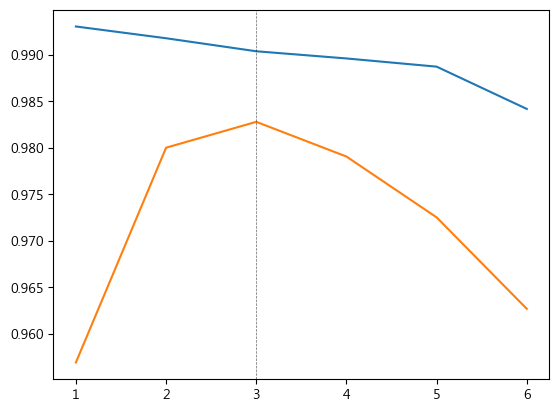

In [65]:
# x축 눈금적용
# g1 = [1,2,3,4,5,6]
g1 = np.arange(1,7).reshape(-1,1)
# g1 = np.log10(alpha_list)
plt.plot(g1,train_score)
plt.plot(g1,test_score)

# 지정위치에 수직/수평선 그리기
# axhline : y축, axvline : x축
plt.axvline(x=3, color='black', linewidth=0.5, ls='--', alpha=0.6)

In [60]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928
